In [1]:
import numpy as np
import os
import subprocess as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.ticker import StrMethodFormatter

In [10]:
# First, let's read all lines to determine which rows to skip
with open("pizza/logFile.dat", 'r') as f:
    lines = f.readlines()
    
# Find which rows have exactly 6 columns
valid_rows = [i for i, line in enumerate(lines) if len(line.split()) == 6]

# Now read the data using the valid rows
df = pd.read_csv("pizza/logFile.dat", 
                 sep='\s+',  # Use regex pattern for any whitespace as separator
                 skiprows=lambda x: x not in valid_rows,  # Skip rows that aren't in our valid_rows list
                 header=0)  # Column names based on the data

print(f"Found {len(df)} rows of data")
print("\nFirst few rows:")
print(df.head())

# sort based on t
df.sort_values(by='t', inplace=True)

Found 18692 rows of data

First few rows:
   i        dt         t            ke      rmax   vAtRmax
0  0  0.000011  0.000000  0.000000e+00  0.999985  0.000000
1  1  0.000011  0.000011  3.222560e-10  0.999985  0.000047
2  2  0.000256  0.000267  1.587820e-07  0.999985  0.000552
3  3  0.000487  0.000754  1.258630e-06  0.999985  0.001187
4  4  0.000660  0.001414  4.411400e-06  0.999986  0.002215


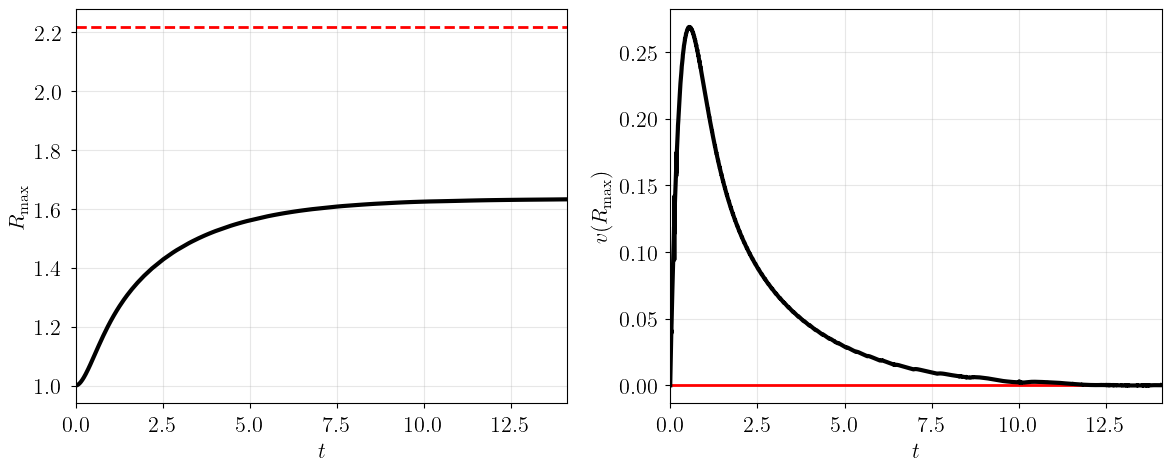

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-v0_8-paper')
# Use LaTeX fonts
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: R_max vs t
ax1.plot(df['t'], df['rmax'], 'k-', linewidth=3)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$R_\mathrm{max}$')
ax1.grid(True, alpha=0.3)

# theory prediction
Pi_plot = 4.0
Pi_c = 6.25467
rMaxTh = 5*(Pi_c-Pi_plot)**(-1)
ax1.plot([0, df['t'].max()], [rMaxTh, rMaxTh], 'r--', linewidth=2)

# Second subplot: v at R_max vs t
ax2.plot([0, df['t'].max()], [0, 0], 'r-', linewidth=2)
ax2.plot(df['t'], df['vAtRmax'], 'k-', linewidth=3)
ax2.set_xlabel('$t$')
ax2.set_ylabel('$v(R_\mathrm{max})$')
ax2.grid(True, alpha=0.3)

ax1.set_xlim(0, df['t'].max())
ax2.set_xlim(0, df['t'].max())

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
# plt.savefig('rmax_v_evolution.pdf', bbox_inches='tight', dpi=300)
plt.show()